# Chapter 2, Example 1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import os
if not os.path.isdir('figures'):
	os.makedirs('figures')

In [2]:
# set parameters
no_epochs = 200
lr = 0.01

SEED = 10
np.random.seed(SEED)

In [3]:
# generate training data
X = 2*np.random.rand(6, 2) - 1
Y = np.dot(X, [2.53, -0.47]) + np.random.rand(6) - 0.5

print('X: {}'.format(X))
print('Y: {}'.format(Y))

X: [[ 0.54264129 -0.9584961 ]
 [ 0.26729647  0.49760777]
 [-0.00298598 -0.55040671]
 [-0.60387427  0.52106142]
 [-0.66177833 -0.82332037]
 [ 0.37071964  0.90678669]]
Y: [ 1.32732389  0.45457668  0.5637576  -1.66017471 -1.06558327  0.303607  ]


In [4]:
# class for a linear neuron
class Linear(object):
  def __init__(self):
    self.w = tf.Variable(np.random.rand(2), dtype=tf.float64)
    self.b = tf.Variable(0., dtype=tf.float64)

  def __call__(self, x):
    return tf.tensordot(x ,self.w, axes=1) + self.b

In [5]:
# squared error as the loss function
def loss(predicted_y, target_y):
  return tf.square(predicted_y - target_y)

In [6]:
# funtion executing a training step
def train_step(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])

  model.w.assign(model.w - learning_rate * dw)
  model.b.assign(model.b - learning_rate * db)

The main function to train the neuron starts here

In [7]:
model = Linear()

# keep an index for training
idx = np.arange(len(X))

err = []
for epoch in range(no_epochs):
  np.random.shuffle(idx)
  X, Y = X[idx], Y[idx]
    
  err_ = []
  for p in np.arange(len(X)):
    
    err_.append(loss(model(X[p]), Y[p]))
    train_step(model, X[p], Y[p], learning_rate=lr)
 
  err.append(np.mean(err_))
  if epoch%10 == 0:
        print('iter: %3d, mse: %1.4f'%(epoch, err[epoch]))


iter:   0, mse: 0.9372
iter:  10, mse: 0.3877
iter:  20, mse: 0.1969
iter:  30, mse: 0.1172
iter:  40, mse: 0.0799
iter:  50, mse: 0.0607
iter:  60, mse: 0.0499
iter:  70, mse: 0.0437
iter:  80, mse: 0.0397
iter:  90, mse: 0.0376
iter: 100, mse: 0.0365
iter: 110, mse: 0.0357
iter: 120, mse: 0.0353
iter: 130, mse: 0.0350
iter: 140, mse: 0.0348
iter: 150, mse: 0.0347
iter: 160, mse: 0.0347
iter: 170, mse: 0.0346
iter: 180, mse: 0.0346
iter: 190, mse: 0.0346


In [8]:
# print learned weights
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))

w: [ 2.09160566 -0.44760788], b: -0.012222245818878444


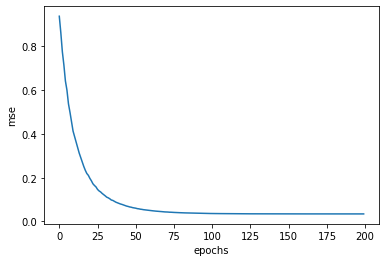

In [9]:
# print learning curve
plt.figure(1)
plt.plot(range(no_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mse')
plt.savefig('./figures/2.1_1.png')

In [10]:
pred = []
for p in np.arange(len(X)):
	pred.append(model(X[p]).numpy())

print(pred)

[1.5517997466700364, 0.2278986514151926, -1.027876851352497, 0.3572921741441695, 0.32412340557192687, -1.508520285432124]


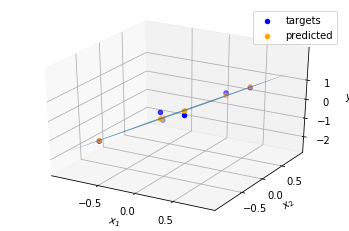

In [11]:
#print targets and predictions
fig = plt.figure(2)
ax = fig.gca(projection = '3d')
plot_original = ax.scatter(X[:,0], X[:,1], Y, c='blue', label='targets')
plot_pred = ax.scatter(X[:,0], X[:,1], pred, c='orange', label='predicted')
X1 = np.arange(-1, 1, 0.1)
X2 = np.arange(-1, 1, 0.1)
X1,X2 = np.meshgrid(X1,X2)
Z = model.w.numpy()[0]*X1 + model.w.numpy()[1]*X2 + model.b.numpy()
regression_plane = ax.plot_surface(X1, X2, Z)
ax.set_zticks([ -2, -1, 0, 1])
ax.set_xticks([-0.5, 0, 0.5])
ax.set_yticks([-0.5, 0, 0.5])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.savefig('./figures/2.1_2.png')